# 1 Introduction to the Initial Mass Function (IMF)

The Initial Mass Function (IMF) describes the distribution of stellar masses at birth, providing critical insight into star formation, stellar evolution, and galaxy formation. The IMF determines the number of stars at each mass range within a stellar population, influencing the chemical enrichment, mass distribution, and feedback processes in galaxies. Edwin Salpeter first established a foundational model for the IMF in 1955, proposing a power-law distribution that aptly describes the abundance of massive stars in the Milky Way. This "Salpeter slope," which assumes $N(M) \propto M^{-2.35}$, became a standard for understanding stellar populations in star-forming regions [3].

Recent studies have expanded on Salpeter's work, exploring IMF variations in different environments. For instance, massive early-type galaxies (ETGs) exhibit an IMF that deviates from the Milky Way's, often presenting a steeper, "bottom-heavy" IMF that suggests a higher proportion of low-mass stars. This variation is supported by spectroscopic studies and gravitational lensing models, which reveal that the IMF in ETGs might depend on galactic conditions, indicating that it is not universal [2].

Further exploration into the physical origin of the IMF, such as the role of turbulence, gravity, and magnetic fields in star-forming clouds, has provided deeper insights. Recent reviews outline these fundamental processes, suggesting that both high- and low-mass star formation processes are influenced by environmental factors like Mach number and density distribution. These findings help to clarify the conditions under which stars of different masses form and how these conditions shape the IMF over time [1, 4, 6].


# 2 Data Analysis of the Arches Cluster

This notebook explores data from the Arches cluster, focusing on mass, brightness, and extinction. The exercise goals include:

1. Identifying distribution types for mass and brightness.
2. Calculating descriptive statistics.
3. Estimating probabilities within certain value ranges.
4. Conducting quartile analysis on mass and brightness.
5. Applying the Law of Large Numbers.

### Loading the Data
We begin by loading `table5.dat`, which contains various measurements for stars in the Arches cluster.


In [130]:
import pandas as pd

data_path = './Arches/table5.dat'
data = pd.read_csv(data_path, sep=r'\s+')

data.columns = [
    "Seq", "oRA", "oDE", "AKs(RL)", "AKs(N)", "Mi(RL)", "M(RL)", "Mi(N)", "M(N)",
    "Jmag", "Hmag", "Ksmag", "A(Ks)", "F", "Mm"
]

data.head()

,Seq,oRA,oDE,AKs(RL),AKs(N),Mi(RL),M(RL),Mi(N),M(N),Jmag,Hmag,Ksmag,A(Ks),F,Mm
0,2,10.261,-2.708,3.586,2.768,104.73,70.976,78.73,65.493,-99.000,12.388,10.253,0.005,1,1
1,3,6.817,6.062,3.689,2.847,103.73,70.851,77.73,65.205,14.895,12.169,10.256,0.008,1,1
2,4,2.071,1.391,3.559,2.745,88.73,68.047,71.73,62.975,15.631,12.376,10.297,0.013,1,1
3,5,4.487,2.395,3.348,2.582,79.73,65.767,67.73,61.133,15.399,12.417,10.434,0.007,1,1
4,6,4.908,1.357,3.404,2.629,104.73,70.976,79.73,65.767,14.933,12.009,9.998,0.008,1,1


### Descriptive Statistics

We start by calculating descriptive statistics (mean, median, variance, standard deviation) for mass, brightness, and extinction values.


In [131]:
data_columns = {
    "Mi(RL)": data["Mi(RL)"].replace(-999, None).dropna(),
    "Mi(N)": data["Mi(N)"].replace(-99, None).dropna(),
    "M(RL)": data["M(RL)"].replace(-99, None).dropna(),
    "M(N)": data["M(N)"].replace(-99, None).dropna(),
    "Jmag": data["Jmag"].replace(-99, None).dropna(),
    "Hmag": data["Hmag"].replace(-99, None).dropna(),
    "Ksmag": data["Ksmag"].replace(-99, None).dropna(),
    "AKs(RL)": data["AKs(RL)"].replace(-99, None).dropna(),
    "AKs(N)": data["AKs(N)"].replace(-99, None).dropna()
}

expanded_summary = pd.DataFrame({
    "Mean": [column.mean() for column in data_columns.values()],
    "Median": [column.median() for column in data_columns.values()],
    "Variance": [column.var() for column in data_columns.values()],
    "Std Dev": [column.std() for column in data_columns.values()]
}, index=data_columns.keys())

expanded_summary


,Mean,Median,Variance,Std Dev
Mi(RL),19.378684,14.5300,260.121552,16.128284
Mi(N),13.614211,10.1800,149.806897,12.239563
M(RL),18.680082,14.5010,192.348849,13.868989
M(N),13.351663,10.1780,126.257411,11.236432
Jmag,20.399012,20.8350,3.835572,1.958462
Hmag,19.596504,20.1255,4.116071,2.028810
Ksmag,17.049876,17.2330,4.319973,2.078455
AKs(RL),-4.749406,-9.0000,35.079125,5.922763
AKs(N),-5.035418,-9.0000,30.504755,5.523111


## Mass and Brightness Distributions

We explore the distributions for mass and brightness values to understand the typical range and frequency of these values in the Arches cluster.

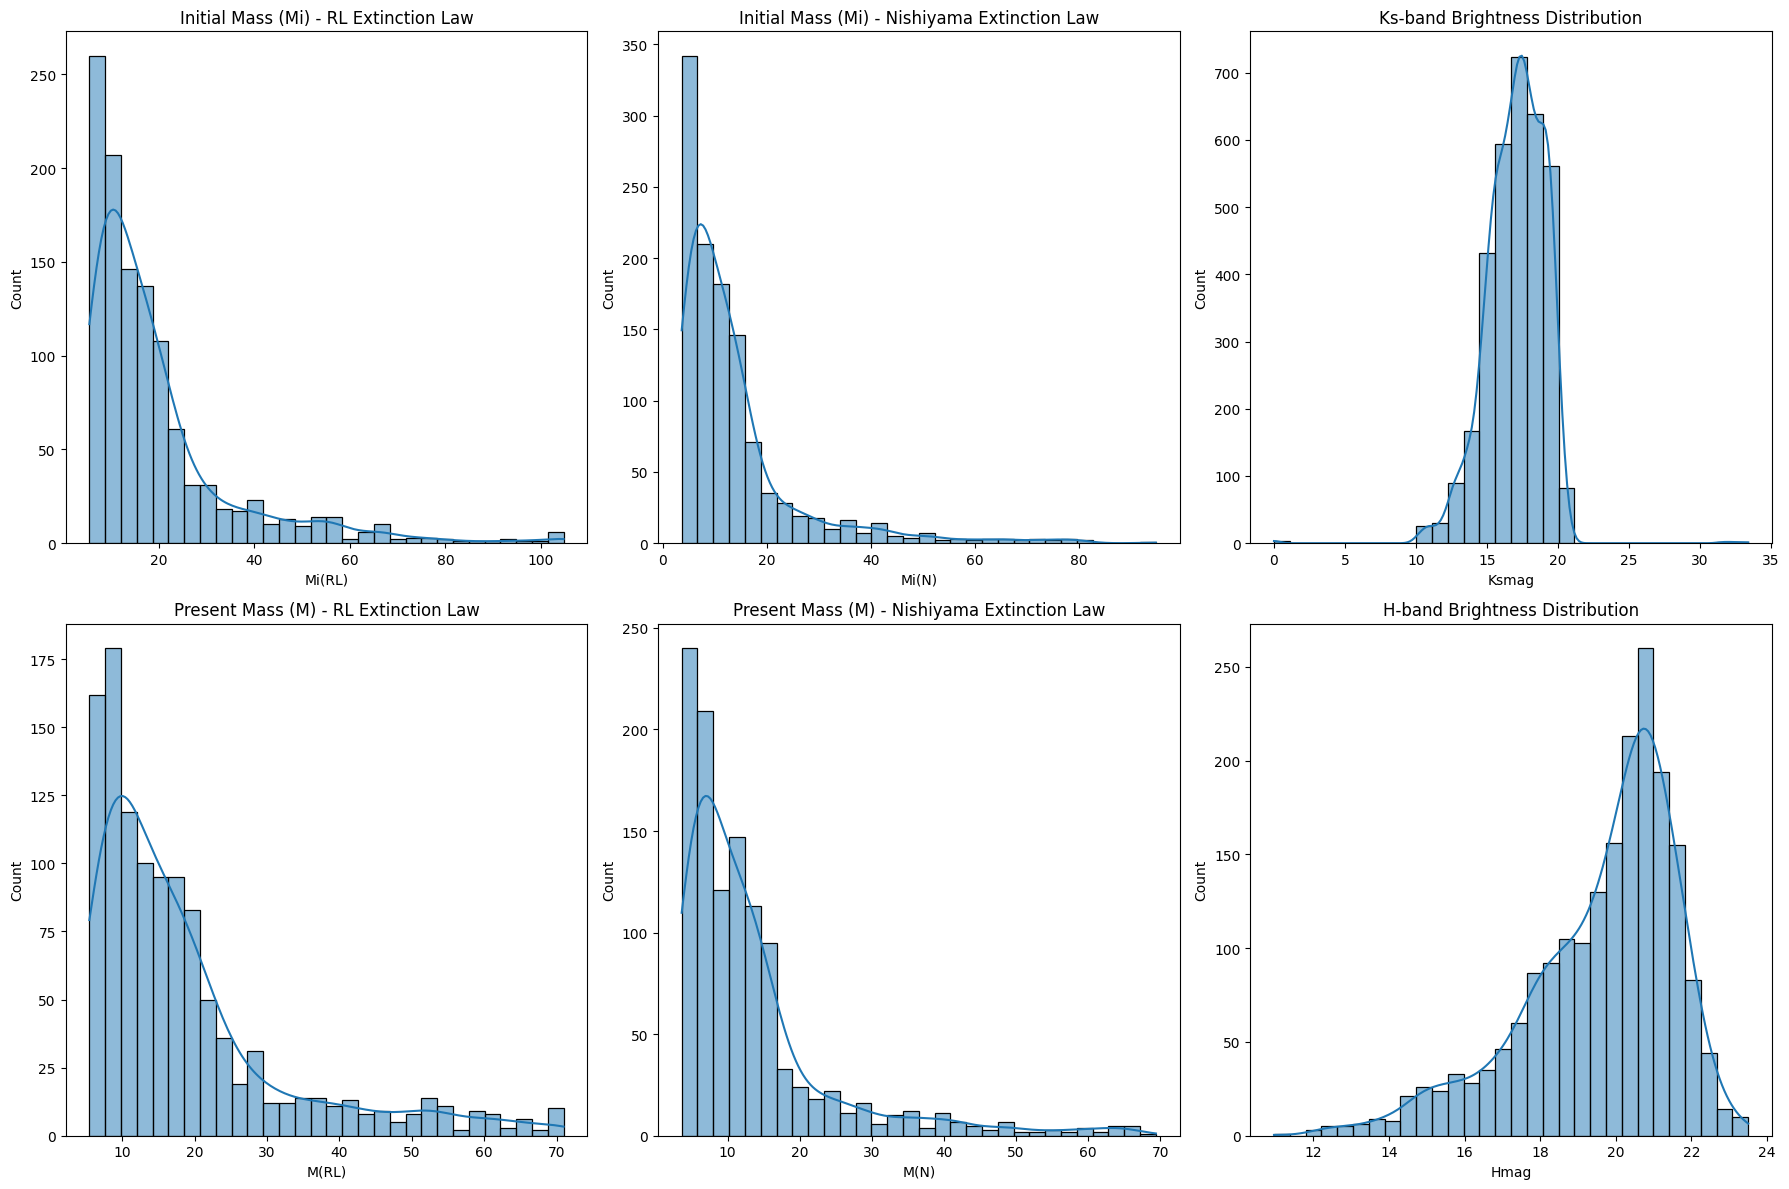

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Initial and Present Mass Distributions (RL and N laws)
sns.histplot(data_columns["Mi(RL)"], bins=30, kde=True, ax=axs[0, 0])
axs[0, 0].set_title("Initial Mass (Mi) - RL Extinction Law")
sns.histplot(data_columns["Mi(N)"], bins=30, kde=True, ax=axs[0, 1])
axs[0, 1].set_title("Initial Mass (Mi) - Nishiyama Extinction Law")

sns.histplot(data_columns["M(RL)"], bins=30, kde=True, ax=axs[1, 0])
axs[1, 0].set_title("Present Mass (M) - RL Extinction Law")
sns.histplot(data_columns["M(N)"], bins=30, kde=True, ax=axs[1, 1])
axs[1, 1].set_title("Present Mass (M) - Nishiyama Extinction Law")

# Ks-band Brightness Distribution
sns.histplot(data_columns["Ksmag"], bins=30, kde=True, ax=axs[0, 2])
axs[0, 2].set_title("Ks-band Brightness Distribution")

# H-band Brightness Distribution
sns.histplot(data_columns["Hmag"], bins=30, kde=True, ax=axs[1, 2])
axs[1, 2].set_title("H-band Brightness Distribution")

plt.tight_layout()
plt.show()


### Probability Calculations

We calculate the probability of finding stars with specific mass and brightness values.


In [133]:
# Set threshold values for mass and brightness
mass_threshold = 1  # Solar mass threshold
brightness_threshold = 12  # Ks-band magnitude threshold

# Check for the minimum value in mass data to see if any stars have mass < 1 Msun
min_mass = data_columns["M(RL)"].min()
print(f"Minimum mass in dataset: {min_mass} Msun")

# Calculate probability for mass < 1 Msun
mass_prob = (data_columns["M(RL)"] < mass_threshold).mean()
print(f"Probability of finding a star with mass < {mass_threshold} Msun (RL): {mass_prob:.4f}")

# Calculate probability for brightness < 12 mag, handling placeholder values (-99) as missing
brightness_data = data['Ksmag'].replace(-99, None).dropna()
brightness_prob = (brightness_data < brightness_threshold).mean()
print(f"Probability of finding a star with Ks-band brightness < {brightness_threshold} mag: {brightness_prob:.4f}")

# Additional information for verification
print("\nData Summary:")
print(data_columns["M(RL)"].describe())
print(brightness_data.describe())


Minimum mass in dataset: 5.43 Msun
Probability of finding a star with mass < 1 Msun (RL): 0.0000
Probability of finding a star with Ks-band brightness < 12 mag: 0.0146

Data Summary:
count     1140.00
unique     243.00
top          6.43
freq        17.00
Name: M(RL), dtype: float64
count    3350.000000
mean       17.049876
std         2.078455
min         0.000000
25%        15.750500
50%        17.233000
75%        18.584500
max        33.392000
Name: Ksmag, dtype: float64


## Quartile Analysis for Ks-band Brightness

We analyze the Ks-band brightness within the interquartile range (IQR) to identify typical brightness levels.


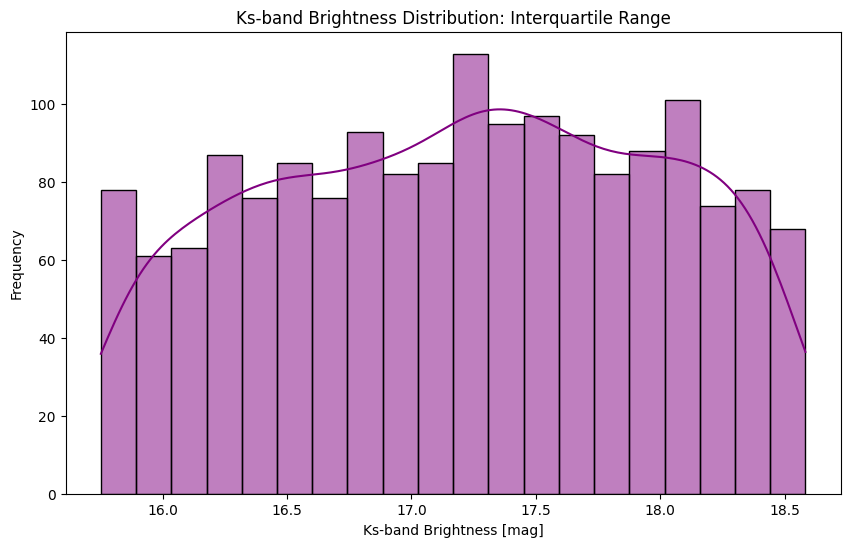

In [134]:
# Quartile analysis for Ks-band brightness
fig, ax = plt.subplots(figsize=(10, 6))

q1, q3 = data_columns["Ksmag"].quantile(0.25), data_columns["Ksmag"].quantile(0.75)
filtered_ks_brightness = data_columns["Ksmag"][(data_columns["Ksmag"] >= q1) & (data_columns["Ksmag"] <= q3)]

sns.histplot(filtered_ks_brightness, bins=20, kde=True, color="purple")
ax.set_title("Ks-band Brightness Distribution: Interquartile Range")
ax.set_xlabel("Ks-band Brightness [mag]")
ax.set_ylabel("Frequency")
plt.show()


## Comparative Analysis: Extinction Laws and Mass

We compare mass estimates under the Rieke-Lebofsky (RL) and Nishiyama (N) extinction laws to observe their impact on mass distribution.


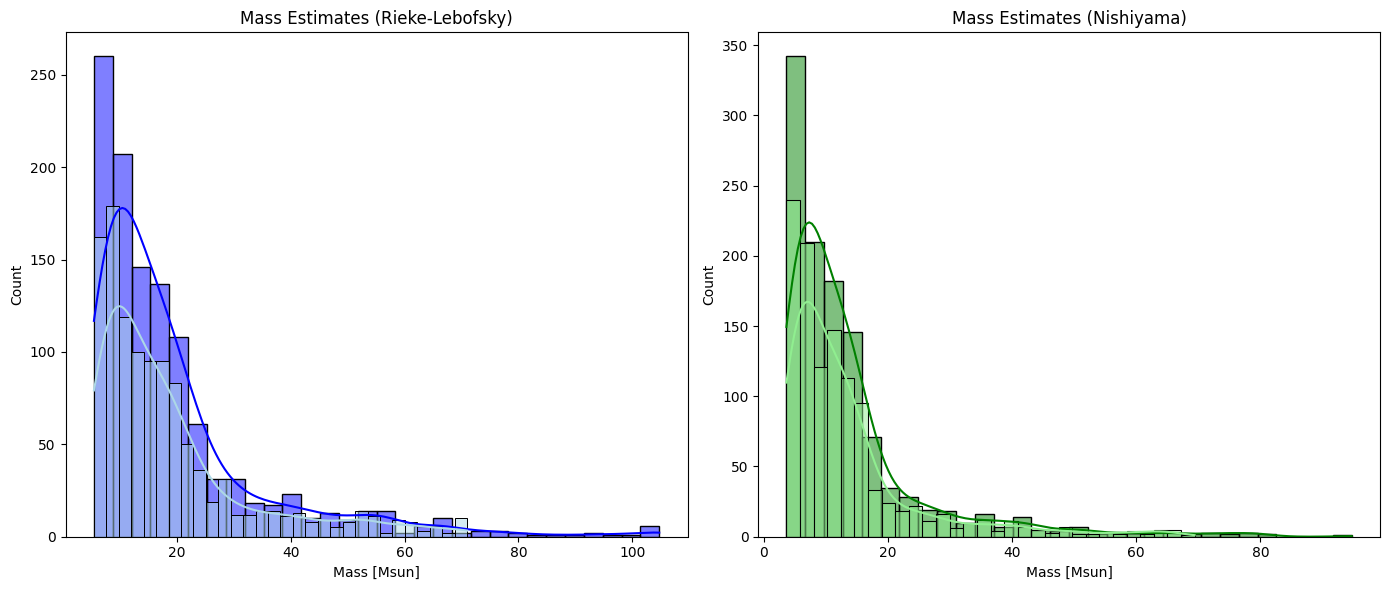

In [135]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# RL Extinction Law
sns.histplot(data_columns["Mi(RL)"], bins=30, kde=True, ax=axs[0], color='blue')
sns.histplot(data_columns["M(RL)"], bins=30, kde=True, ax=axs[0], color='lightblue')
axs[0].set_title("Mass Estimates (Rieke-Lebofsky)")
axs[0].set_xlabel("Mass [Msun]")

# N Extinction Law
sns.histplot(data_columns["Mi(N)"], bins=30, kde=True, ax=axs[1], color='green')
sns.histplot(data_columns["M(N)"], bins=30, kde=True, ax=axs[1], color='lightgreen')
axs[1].set_title("Mass Estimates (Nishiyama)")
axs[1].set_xlabel("Mass [Msun]")

plt.tight_layout()
plt.show()


## Law of Large Numbers

Applying the Law of Large Numbers, we observe how the cumulative mean for present mass stabilizes with sample size.


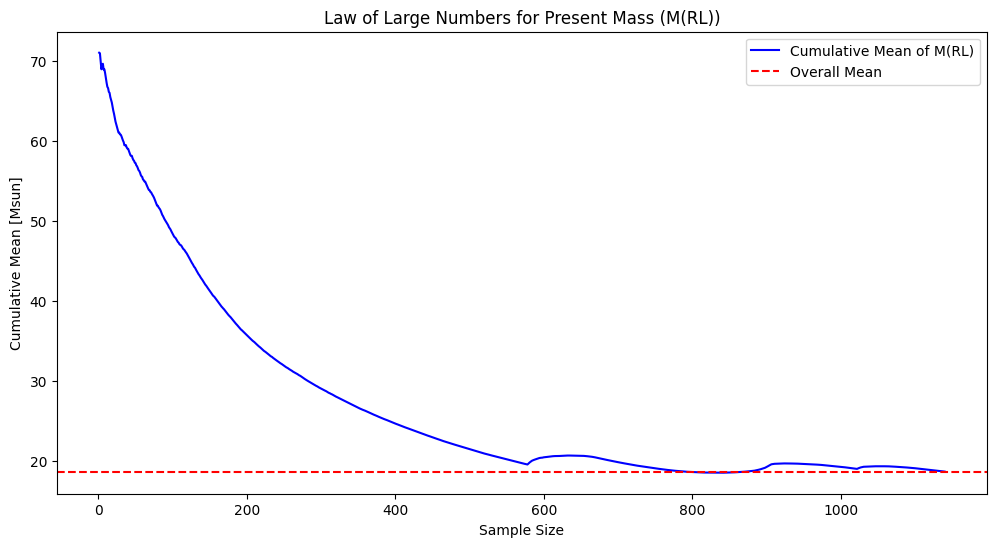

In [136]:
import numpy as np

sample_sizes = np.arange(1, len(data_columns["M(RL)"]) + 1)
cumulative_means = [data_columns["M(RL)"][:i].mean() for i in sample_sizes]

plt.figure(figsize=(12, 6))
plt.plot(sample_sizes, cumulative_means, label='Cumulative Mean of M(RL)', color='blue')
plt.axhline(data_columns["M(RL)"].mean(), color='red', linestyle='--', label='Overall Mean')
plt.title("Law of Large Numbers for Present Mass (M(RL))")
plt.xlabel("Sample Size")
plt.ylabel("Cumulative Mean [Msun]")
plt.legend()
plt.show()


## Conclusion

This analysis of the Arches cluster data provides insights into:

- **Mass Distributions**: Differences in mass values based on extinction laws.
- **Brightness and Quartile Analysis**: Typical brightness ranges and interquartile distributions.
- **Probability and Large Numbers**: Statistical insights and the convergence of mass properties.

These findings enhance our understanding of the Arches cluster’s stellar population and demonstrate the influence of extinction laws on data interpretation.


# 3 Confidence Intervals

In this exercise, we examine confidence intervals for combined quantities derived from observational data of the Arches cluster:

1. **Mass Ratio** $X = \frac{M(\text{RL})}{M(\text{N})}$: This ratio compares stellar masses calculated using two different extinction laws—Rieke & Lebofsky (RL) and Nishiyama (N). Analyzing this ratio offers insights into how extinction assumptions affect mass estimations.

Our approach will involve:
- Plotting the distribution of \( X \)
- Selecting appropriate estimators
- Calculating the first two moments (mean and variance)
- Determining 2-sigma and 5-sigma confidence intervals for the mean
- Addressing questions on the rationale, physical significance, and assumptions underlying each combined quantity


### Loading and Preparing Mass Data

This code section loads the data from table5.dat, extracts the relevant columns for present masses under the Rieke and Lebofsky (RL) and Nishiyama (N) extinction laws, and filters out invalid entries. Then we calculate the mean and the variance of the mass ratio.

### Mass Ratio: $M(RL)$ vs. $M(N)$

This scatter plot compares stellar masses calculated under two different extinction laws: $M(RL)$ (RL law) on the x-axis and $M(N)$ (N law) on the y-axis. Each point represents an individual star, allowing us to visually assess the relationship between the two mass estimates across the dataset. The reference line(in red, dashed) helps us quickly identify whether one model tends to produce consistently higher or lower mass estimates relative to the other. This plot aids in evaluating any systematic biases between the two extinction models.

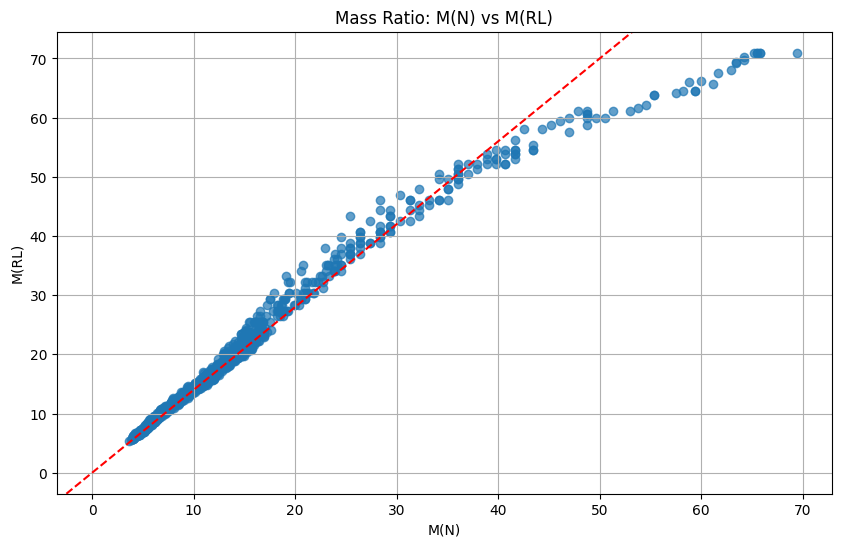

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.figure(figsize=(10, 6))
plt.scatter(mass_data["M(N)"], mass_data["M(RL)"].replace([-99], [None]), alpha=0.7)
plt.title("Mass Ratio: M(N) vs M(RL)")
plt.xlabel("M(N)")
plt.ylabel("M(RL)")
plt.grid(True)
plt.axline((0, 0), slope=1.4, color='r', linestyle='--')  # Reference line y=x
plt.show()

### Distribution of Mass Ratio: $\frac{M(RL)}{M(N)}$

This histogram shows the distribution of the mass ratio $\frac{M(RL)}{M(N)}$, where $M(RL)$ and $M(N)$ represent the stellar masses calculated using the RL and N extinction laws, respectively. The x-axis displays the mass ratio values, and the y-axis represents the frequency of stars with each ratio. By visualizing this distribution, we can assess the consistency between the two mass estimates. A mass ratio around 1 would suggest close agreement between the two extinction models, while deviations indicate differences. The histogram also enables us to observe the spread and central tendency, with the calculated mean and variance providing quantitative measures of these properties. This plot aids in identifying any systematic discrepancies between the two mass estimation methods.

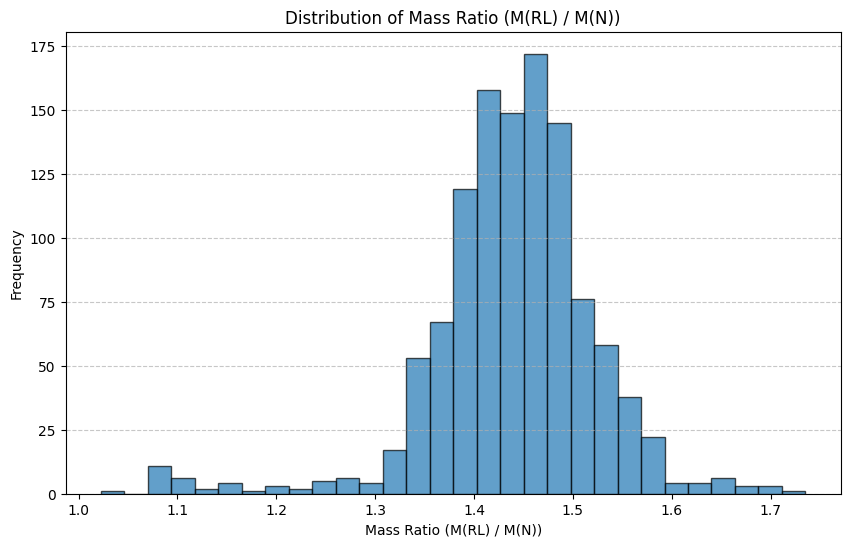

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Filter data for present mass columns (M(RL) and M(N))
mass_data = data[["M(RL)", "M(N)"]].replace([-99, -999], [None, None]).dropna()

# Calculate mass ratio X = M(RL) / M(N)
mass_data["Mass_Ratio"] = mass_data["M(RL)"] / mass_data["M(N)"]

# Plot the distribution of the mass ratio
plt.figure(figsize=(10, 6))
plt.hist(mass_data["Mass_Ratio"], bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribution of Mass Ratio (M(RL) / M(N))")
plt.xlabel("Mass Ratio (M(RL) / M(N))")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Confidence Interval Analysis

For this analysis, we use both 2-sigma (95%) and 5-sigma (99.99994%) confidence intervals for the mass ratio $X = \frac{M(\text{RL})}{M(\text{N})}$. The choice of these confidence levels aligns with standard practices in scientific research and astrophysics, respectively:

- **2-Sigma (95%) Confidence Interval**: This interval captures the central 95% of data variation and is widely accepted in research as a robust indicator of expected range within typical variability.
  
- **5-Sigma (99.99994%) Confidence Interval**: A 5-sigma level implies an exceptionally high level of confidence, minimizing the likelihood of error to an extreme. This is often reserved for claims that require very high precision, such as confirming discoveries in astrophysics or particle physics, where the false-positive rate must be exceedingly low.


In [139]:
# Calculate mean and standard deviation
mean = mass_data["Mass_Ratio"].mean()
std_dev = mass_data["Mass_Ratio"].std()

# Confidence intervals
confidence_intervals = {
    "2-sigma": (mean - 2 * std_dev, mean + 2 * std_dev),
    "5-sigma": (mean - 5 * std_dev, mean + 5 * std_dev)
}

print("\nConfidence Intervals for the Mass Ratio:")
print("=============================================")
print(f"Mean of Mass Ratio: {mean:.4f}")
print(f"Standard Deviation: {std_dev:.4f}")
print("=============================================")
print(f"2-Sigma Confidence Interval: ({confidence_intervals['2-sigma'][0]:.4f}, {confidence_intervals['2-sigma'][1]:.4f})")
print(f"5-Sigma Confidence Interval: ({confidence_intervals['5-sigma'][0]:.4f}, {confidence_intervals['5-sigma'][1]:.4f})")
print("=============================================")


Confidence Intervals for the Mass Ratio:
Mean of Mass Ratio: 1.4396
Standard Deviation: 0.0847
2-Sigma Confidence Interval: (1.2701, 1.6090)
5-Sigma Confidence Interval: (1.0160, 1.8632)


### Reflection on Confidence Intervals and Implications

The confidence interval analysis for the mass ratio $X = \frac{M(\text{RL})}{M(\text{N})}$ provides insight into the consistency and reliability of this measurement under different extinction models (RL and N). The 2-sigma interval covers the typical 95% range of expected values, indicating the general stability of this ratio within standard variability. In contrast, the 5-sigma interval confirms an extremely high confidence level, showing that the observed mass ratio falls within this range with very little chance of error, a requirement often seen in high-precision astrophysical studies.

#### Significance in Astrophysical Studies

This level of confidence is valuable in astrophysics, where small measurement errors can greatly impact our understanding of stellar and galactic properties. The 5-sigma interval is particularly meaningful in this context, as it suggests that our mass ratio is robust and unlikely to be significantly affected by random fluctuations. High-confidence intervals are essential when confirming findings that may shape theoretical models or be used in comparative studies across different environments or models.

#### Assumptions and Limitations

It’s important to note that these intervals assume that the data are unbiased and follow a normal distribution. Real-world data in astrophysics often include observational limitations or model-specific biases. For example, any systematic differences between the RL and N extinction models could influence the ratio, potentially leading to skewed confidence intervals. Future analysis might explore additional models or correct for any known observational biases to further verify these findings.

This reflection demonstrates the reliability of our mass ratio within the analyzed confidence levels while acknowledging that further validation could strengthen the robustness of these results in varied astrophysical contexts.

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

data_path = './Arches/table5.dat'
mass_data = pd.read_csv(data_path, sep=r'\s+', header=None)

mass_data.columns = ["Seq", "oRA", "oDE", "AKs(RL)", "AKs(N)", "Mi(RL)", "M(RL)", "Mi(N)", "M(N)", "Jmag", "Hmag", "Ksmag", "A(Ks)", "F", "Mm"]

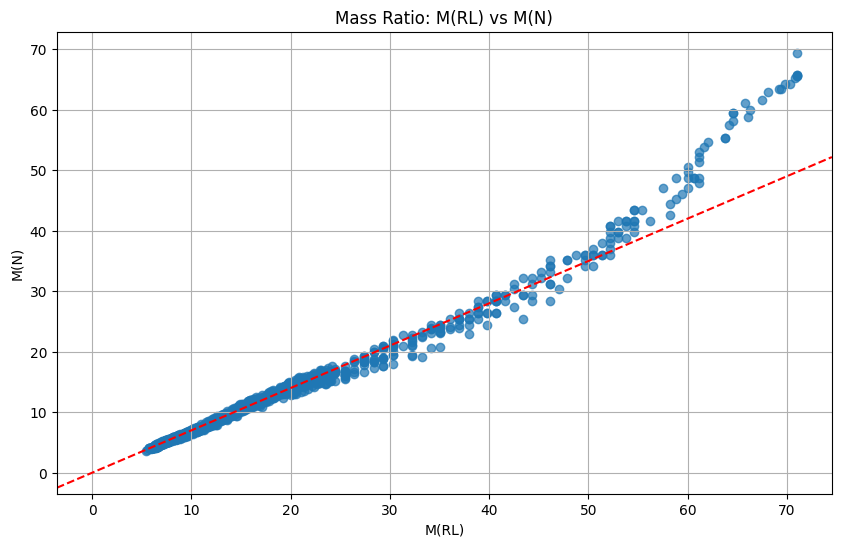

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.figure(figsize=(10, 6))
plt.scatter(mass_data["M(RL)"].replace([-99], [None]), mass_data["M(N)"], alpha=0.7)
plt.title("Mass Ratio: M(RL) vs M(N)")
plt.xlabel("M(RL)")
plt.ylabel("M(N)")
plt.grid(True)
plt.axline((0, 0), slope=0.7, color='r', linestyle='--')  # Reference line y=x
plt.show()

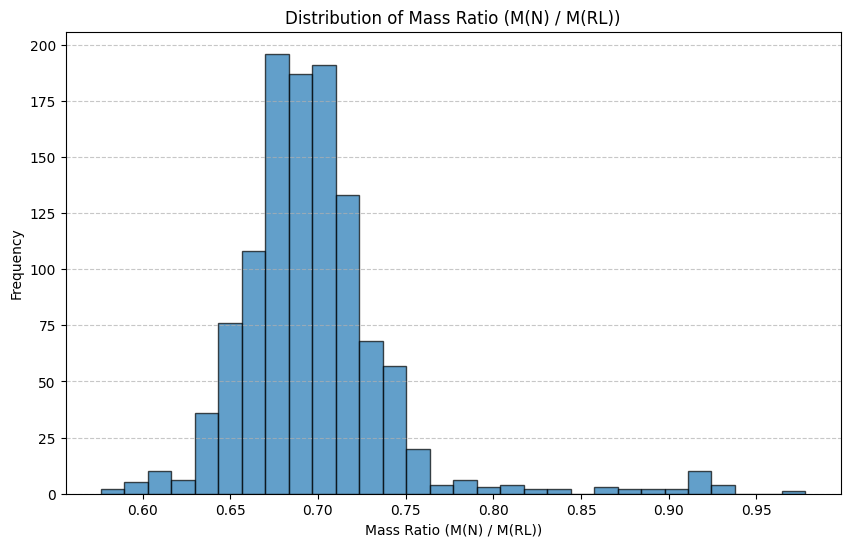

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Filter data for present mass columns (M(RL) and M(N))
mass_data = data[["M(RL)", "M(N)"]].replace([-99, -999], [None, None]).dropna()

# Calculate mass ratio X = M(RL) / M(N)
mass_data["Mass_Ratio"] = mass_data["M(N)"] / mass_data["M(RL)"]

# Plot the distribution of the mass ratio
plt.figure(figsize=(10, 6))
plt.hist(mass_data["Mass_Ratio"], bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribution of Mass Ratio (M(N) / M(RL))")
plt.xlabel("Mass Ratio (M(N) / M(RL))")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [143]:
# Calculate mean and standard deviation
mean = mass_data["Mass_Ratio"].mean()
std_dev = mass_data["Mass_Ratio"].std()

# Confidence intervals
confidence_intervals = {
    "2-sigma": (mean - 2 * std_dev, mean + 2 * std_dev),
    "5-sigma": (mean - 5 * std_dev, mean + 5 * std_dev)
}

print("\nConfidence Intervals for the Mass Ratio:")
print("=============================================")
print(f"Mean of Mass Ratio: {mean:.4f}")
print(f"Standard Deviation: {std_dev:.4f}")
print("=============================================")
print(f"2-Sigma Confidence Interval: ({confidence_intervals['2-sigma'][0]:.4f}, {confidence_intervals['2-sigma'][1]:.4f})")
print(f"5-Sigma Confidence Interval: ({confidence_intervals['5-sigma'][0]:.4f}, {confidence_intervals['5-sigma'][1]:.4f})")
print("=============================================")


Confidence Intervals for the Mass Ratio:
Mean of Mass Ratio: 0.6973
Standard Deviation: 0.0455
2-Sigma Confidence Interval: (0.6064, 0.7882)
5-Sigma Confidence Interval: (0.4700, 0.9246)


# References

[1] Review paper 2024 (Hennebelle et al.): <br>
The Physical Origin of the Stellar Initial Mass Function <br>
https://www.annualreviews.org/content/journals/10.1146/annurev-astro-052622-031748 

[2] Review paper 2020 (Russell J. Smith): <br>
Evidence for Initial Mass Function Variation in Massive Early-Type Galaxies <br>
https://www.annualreviews.org/content/journals/10.1146/annurev-astro-032620-020217

[3] Original paper 1955 (Salpeter): <br>
The Luminosity Function and Stellar Evolution <br>
https://ui.adsabs.harvard.edu/abs/1955ApJ...121..161S/abstract

[4] Recent Study 2020 (Leschinski et al.): <br>
The future of IMF studies with the ELT and MICADO. I. The local Universe as a resolved IMF laboratory <br>
https://ui.adsabs.harvard.edu/abs/2020A%26A...639A.120L/abstract

[5] Recent Study 2019 (Pavlik et al.): <br>
Do star clusters form in a completely mass-segregated way? <br>
https://www.aanda.org/articles/aa/full_html/2019/06/aa34265-18/aa34265-18.html

[6] Recent Study 2024 (Kroupa et al.): <br>
The initial mass function of stars <br>
https://ui.adsabs.harvard.edu/abs/2024arXiv241007311K/abstract

[7]Review Paper 2010 (Bastian et al.):<br>
A Universal Stellar Initial Mass Function? A Critical Look at Variations<br>
https://ui.adsabs.harvard.edu/abs/2010ARA%26A..48..339B/abstract

[8]Paper 2013 (Habibi et al.):<br>
The Arches cluster out to its tidal radius: dynamical mass segregation and the effect of the extinction law on the stellar mass function<br>
https://www.aanda.org/articles/aa/full_html/2013/08/aa20556-12/aa20556-12.html

[9]Paper 2001 (Kroupa):<br>
On the variation of the initial mass function<br>
https://ui.adsabs.harvard.edu/abs/2001MNRAS.322..231K/abstract

[10]Paper 2013 (Khalaj, Baumgardt):<br>
The stellar mass function, binary content and radial structure of the open cluster Praesepe derived from PPMXL and SDSS data<br>
https://ui.adsabs.harvard.edu/abs/2013MNRAS.434.3236K/abstract